In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# **Can simple linear regression be considered a ML method?**

In [2]:
t = [2,4,6,10,100,500,1000]
rmse = [0]*len(t) 

x = np.random.uniform(-3,3,1000)

y = 2*x + 3 + np.random.normal(0,2, 1000)


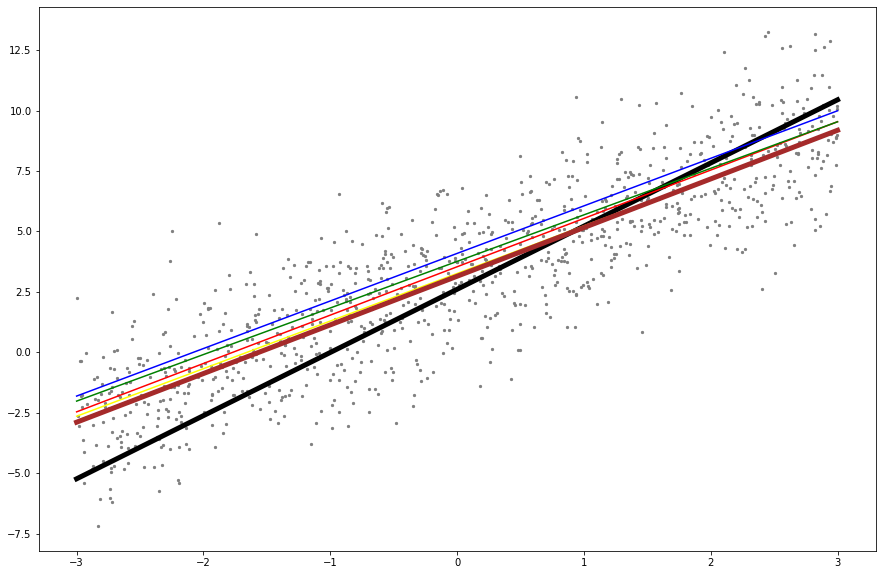

In [4]:

plt.figure(figsize=(15,10))
plt.scatter(x,y, s=5, color="grey")

co = ["black","red","green","blue","yellow","cyan","brown"]

for i in range(0, len(t)):



  x_partial, y_partial = x[:t[i]].reshape(1, -1) ,y[:t[i]].reshape(1, -1)



  m = LinearRegression().fit(x_partial.T, y_partial.T)

  b = m.coef_[0][0] 
  a = m.intercept_[0]

  y_estimate = a + b * x
  rmse[i] = math.sqrt(np.mean((y - y_estimate)**2))

  f = lambda xi : a + b*xi
  if ((i==0) or (i==(len(t)-1))):
    plt.plot([-3,3],[f(-3), f(3)], c = co[i],linewidth=5)
  else:
    plt.plot([-3,3],[f(-3), f(3)], c = co[i])


plt.show()



In [5]:
rmse

[2.2659173638043635,
 1.9897077447865485,
 2.0499444428269564,
 2.16823631919792,
 1.955510871571366,
 1.950981441525572,
 1.950742126415348]

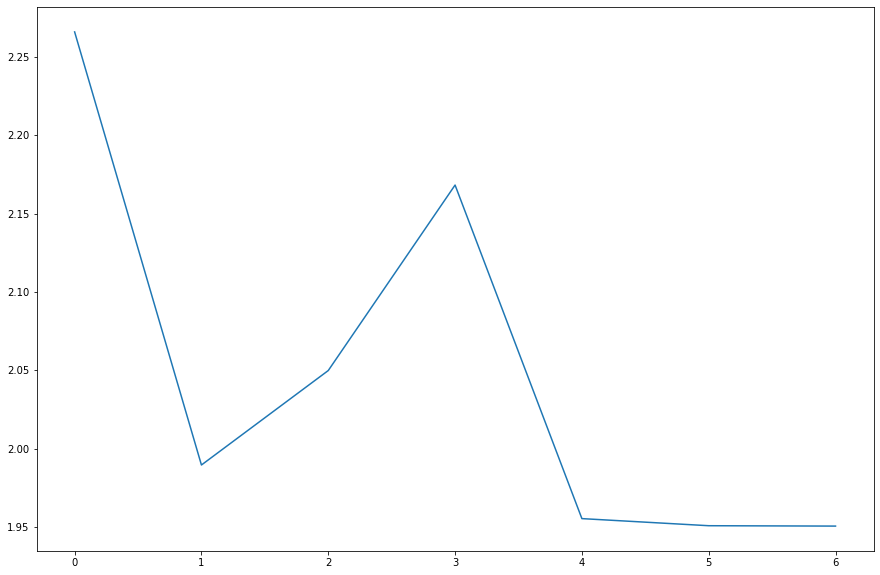

In [6]:
i=range(0,len(t))
plt.figure(figsize=(15,10))
plt.plot(i,rmse)
plt.show()

# **Conjugate analysis for a Beta-Binomial model**

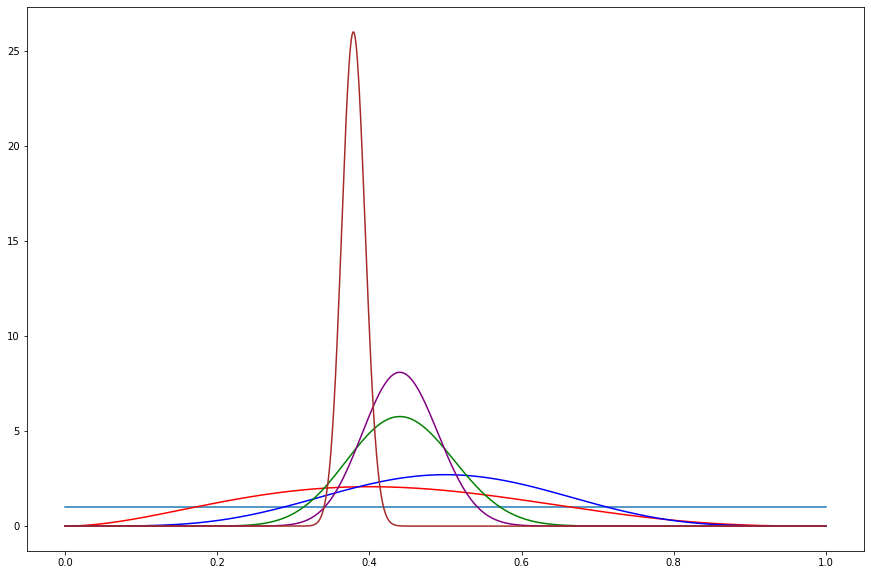

In [7]:
data = np.random.binomial(1,0.4,1000)
x = np.linspace(0,1, 1000)
plt.figure(figsize=(15,10))
plt.plot(x, stats.beta.pdf(x,1,1))

n=5
su = sum(data[1:n])
plt.plot(x, stats.beta.pdf(x,1+su,1+n-su),c="red")

n=10
su = sum(data[1:n])
plt.plot(x, stats.beta.pdf(x,1+su,1+n-su),c="blue")

n=50
su = sum(data[1:n])
plt.plot(x, stats.beta.pdf(x,1+su,1+n-su),c="green")

n=100
su = sum(data[1:n])
plt.plot(x, stats.beta.pdf(x,1+su,1+n-su),c="purple")

n=1000
su = sum(data[1:n])
plt.plot(x, stats.beta.pdf(x,1+su,1+n-su),c="brown")


plt.show()

# **Bayesian linear regression**

In [32]:
N = 5000
x = np.random.uniform(0,3,N)
y = 3*x + 1 + np.random.normal(0,1,N)

Now we define the prior on w0 to be a N(a0,b0), initially N(0,1)

In [33]:
a0 = 0
b0 = 1

The same for w1

In [34]:
a1 = 0
b1 = 1

Sample size for each iteration: K

In [35]:
K = 1000
for i in range(0,N):
  s_w0 = np.random.normal(a0,b0,K) 
  s_w1 = np.random.normal(a1,b1,K)
  s_epsilon = np.random.normal(0,1,K)
  var_yi = b0**2+b1**2*x[i]**2+1
  
  p = stats.norm.pdf(s_w0,a0,b0) * stats.norm.pdf(s_w1,a1,b1) * stats.norm.pdf(y[i],s_w0+s_w1*x[i]+s_epsilon,math.sqrt(var_yi))
  p_star = stats.norm.pdf(s_w0,a0,b0) * stats.norm.pdf(s_w1,a1,b1)
  weights = p / p_star
  sum_weights = sum(weights)
  
  est_a0 = 1/sum_weights*sum(weights*s_w0)
  est_b0 = 1/sum_weights*sum(weights*s_w0**2)
  a0 = est_a0
  b0 = math.sqrt(est_b0-est_a0**2)
  
  est_a1 = 1/sum_weights*sum(weights*s_w1)
  est_b1 = 1/sum_weights*sum(weights*s_w1**2)
  a1 = est_a1
  b1 = math.sqrt(est_b1-est_a1**2)


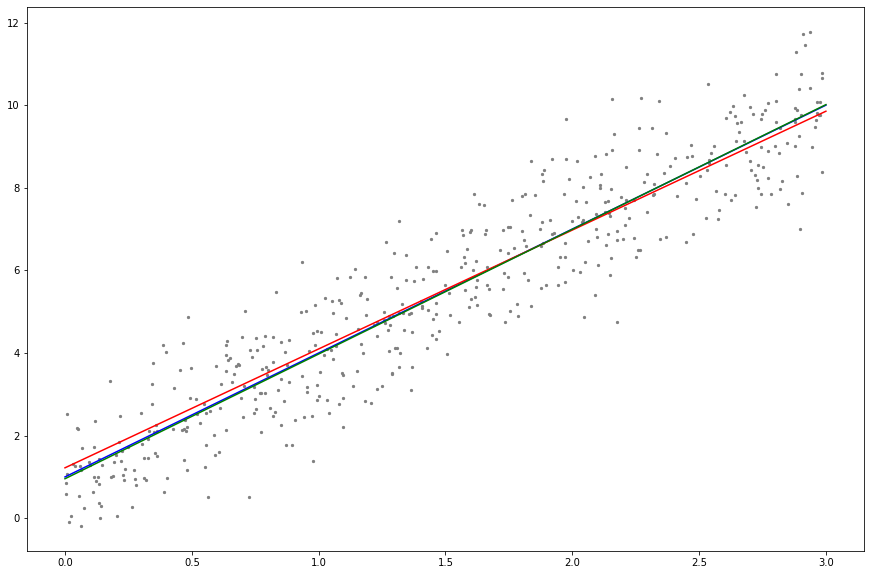

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(x,y, s=5, color="grey")
f_exact = lambda xi : 1 + 3*xi
f_estimated = lambda xi : a0 + a1*xi
plt.plot([0,3],[f_exact(0), f_exact(3)], c = "blue")
plt.plot([0,3],[f_estimated(0), f_estimated(3)], c = "red")
m = LinearRegression().fit(x.reshape(1,-1).T,y.reshape(1,-1).T)

b = m.coef_[0][0] 
a = m.intercept_[0]
f_lr = lambda xi : a + b*xi
plt.plot([0,3],[f_lr(0), f_lr(3)], c = "green")

plt.show()